In [ ]:
"""
Los sistemas de recomendación se categorizan en:
-Problemas de predicción
-Problemas de clasificación

"""

In [1]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

In [2]:
movie_rating=pd.read_csv('movie_ratings.csv', index_col='Movie')
movie_rating

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
Incredibles 2,4,2,3,4,4
Jurassic World: Fallen Kingdom,2,3,5,4,5
Mission: Impossible – Fallout,5,5,4,3,2


In [6]:
movie_rating=movie_rating.transpose()
movie_rating

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [4]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Brandon to Samantha
Data columns (total 10 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Aquaman                                      5 non-null      int64
 1   Avengers: Infinity War                       5 non-null      int64
 2   Black Panther                                5 non-null      int64
 3   Bohemian Rhapsody                            5 non-null      int64
 4   Deadpool 2                                   5 non-null      int64
 5   Fantastic Beasts: The Crimes of Grindelwald  5 non-null      int64
 6   Incredibles 2                                5 non-null      int64
 7   Jurassic World: Fallen Kingdom               5 non-null      int64
 8   Mission: Impossible – Fallout                5 non-null      int64
 9   Venom                                        5 non-null      int64
dtypes: int64(10)
memory us

In [90]:
def rating_scatter(df,movie1,movie2):
  x=df[movie1]
  y=df[movie2]

  fig,ax=plt.subplots()
  ax.scatter(x,y,s=100,marker='*')
  fig.set_figwidth(10)
  fig.set_figheight(5)
  plt.title('Espacio de preferencia '+ movie1+' vs '+movie2)

  ax.set_xlabel(movie1,fontsize=12)
  ax.set_ylabel(movie2,fontsize=12)

  n=list(df.index)
  test=[]
  for i,txt in enumerate(n):
    
    if [x[i],y[i]] in test:
      ax.annotate(txt, (x[i]+0.05,y[i]-0.15),fontsize=10)
      
      
    else:
      ax.annotate(txt, (x[i]+0.05,y[i]),fontsize=10)
      
    test.append([x[i],y[i]])
    

HOLA


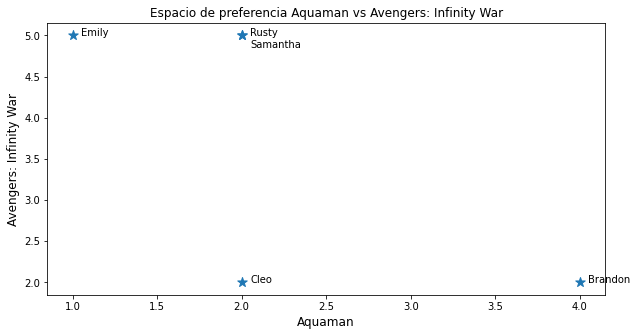

In [88]:
rating_scatter(movie_rating,'Aquaman','Avengers: Infinity War')

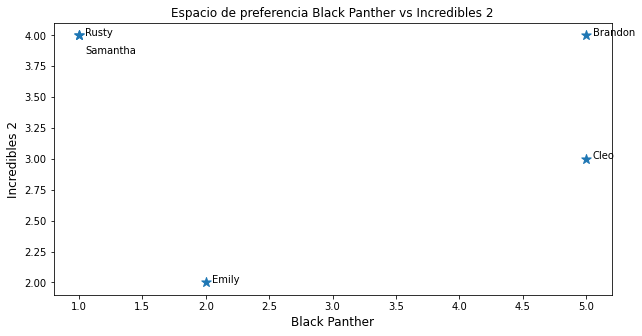

In [92]:
rating_scatter(movie_rating,'Black Panther','Incredibles 2')

In [93]:
pdist(movie_rating, metric='euclidean')

array([6.63324958, 6.        , 7.41619849, 7.48331477, 6.92820323,
       6.40312424, 5.09901951, 5.56776436, 8.24621125, 6.70820393])

In [102]:
dist_eucl=1/(1+squareform(pdist(movie_rating, metric='euclidean') ))
dist_eucl

array([[1.        , 0.1310058 , 0.14285714, 0.11881849, 0.11787845],
       [0.1310058 , 1.        , 0.12613198, 0.13507811, 0.16396078],
       [0.14285714, 0.12613198, 1.        , 0.15225881, 0.10815241],
       [0.11881849, 0.13507811, 0.15225881, 1.        , 0.12973191],
       [0.11787845, 0.16396078, 0.10815241, 0.12973191, 1.        ]])

In [98]:
distance=pd.DataFrame(dist_eucl, 
                      index=movie_rating.index,columns=movie_rating.index)
distance

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [105]:
dist=1/(1+squareform(pdist(movie_rating, metric='cosine') ))
dist

array([[1.        , 0.85717409, 0.88525994, 0.83826671, 0.82312842],
       [0.85717409, 1.        , 0.8333991 , 0.86370322, 0.88748526],
       [0.88525994, 0.8333991 , 1.        , 0.89841527, 0.78038819],
       [0.83826671, 0.86370322, 0.89841527, 1.        , 0.85189757],
       [0.82312842, 0.88748526, 0.78038819, 0.85189757, 1.        ]])

In [106]:
dist=1/(1+squareform(pdist(movie_rating, metric='cosine') ))
dist
distance=pd.DataFrame(dist, 
                      index=movie_rating.index,columns=movie_rating.index)
distance

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.857174,0.885260,0.838267,0.823128
Emily,0.857174,1.000000,0.833399,0.863703,0.887485
Cleo,0.885260,0.833399,1.000000,0.898415,0.780388
Rusty,0.838267,0.863703,0.898415,1.000000,0.851898
Samantha,0.823128,0.887485,0.780388,0.851898,1.000000


In [107]:
new_rating=pd.read_csv('movie_ratings2.csv',index_col='Movie')
new_rating

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [108]:
recommendations=new_rating.copy()

In [110]:
Luis = {'Aquaman': 3,
'Avengers: Infinity War': 5, 
'Black Panther': 4, 
'Bohemian Rhapsody': 5, 
'Deadpool 2': 4, 
'Fantastic Beasts: The Crimes of Grindelwald': 2,
'Incredibles 2': 5, 
'Jurassic World: Fallen Kingdom': 1, 
'Mission: Impossible – Fallout': 2, 
'Venom': 3}

In [111]:
movie_rating.loc['Luis']=list(Luis.values())
movie_rating

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2
Luis,3,5,4,5,4,2,5,1,2,3


In [112]:
dist=1/(1+squareform(pdist(movie_rating, metric='cosine') ))
dist
distance=pd.DataFrame(dist, 
                      index=movie_rating.index,columns=movie_rating.index)
distance

,Brandon,Emily,Cleo,Rusty,Samantha,Luis
Brandon,1.000000,0.857174,0.885260,0.838267,0.823128,0.869165
Emily,0.857174,1.000000,0.833399,0.863703,0.887485,0.841435
Cleo,0.885260,0.833399,1.000000,0.898415,0.780388,0.875019
Rusty,0.838267,0.863703,0.898415,1.000000,0.851898,0.910838
Samantha,0.823128,0.887485,0.780388,0.851898,1.000000,0.797936
Luis,0.869165,0.841435,0.875019,0.910838,0.797936,1.000000


In [115]:
similarities=distance['Luis'].sort_values(ascending=False)[1:]
similarities

Rusty       0.910838
Cleo        0.875019
Brandon     0.869165
Emily       0.841435
Samantha    0.797936
Name: Luis, dtype: float64

In [117]:
for name,score in dict(similarities).items():
  print('El nombre del usuario es ', name)
  print('Su score es: ', score)
  print(recommendations[name])
  recommendations[name]=recommendations[name]*score
  print(recommendations[name])
  print('-----------'*15)

El nombre del usuario es  Rusty
Su score es:  0.9108384629336974
Movie
Beauty and the Beast              4.554192
Despicable Me 3                   0.910838
Guardians of the Galaxy Vol. 2    3.643354
Jumanji: Welcome to the Jungle    1.821677
Spider-Man: Homecoming            1.821677
Star Wars: The Last Jedi          1.821677
The Fate of the Furious           2.732515
Thor: Ragnarok                    0.910838
Wolf Warrior 2                    2.732515
Wonder Woman                      2.732515
Name: Rusty, dtype: float64
Movie
Beauty and the Beast              4.148134
Despicable Me 3                   0.829627
Guardians of the Galaxy Vol. 2    3.318507
Jumanji: Welcome to the Jungle    1.659253
Spider-Man: Homecoming            1.659253
Star Wars: The Last Jedi          1.659253
The Fate of the Furious           2.488880
Thor: Ragnarok                    0.829627
Wolf Warrior 2                    2.488880
Wonder Woman                      2.488880
Name: Rusty, dtype: float64
-------

In [121]:
recommendations['Total']=recommendations.sum(axis=1)
recommendations.sort_values('Cleo',ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,3.021792,3.540065,3.828287,0.829627,1.273403,49.972695
Guardians of the Galaxy Vol. 2,3.021792,0.708013,3.828287,3.318507,1.273403,48.600008
Spider-Man: Homecoming,0.755448,2.124039,3.828287,1.659253,3.183507,46.202139
Thor: Ragnarok,3.021792,2.124039,3.062630,0.829627,3.183507,48.886378
Wonder Woman,3.021792,2.124039,3.062630,2.488880,2.546806,52.976586
Jumanji: Welcome to the Jungle,3.021792,2.124039,2.296972,1.659253,3.183507,49.142255
The Fate of the Furious,1.510896,0.708013,2.296972,2.488880,1.910104,35.659463
Beauty and the Beast,1.510896,3.540065,1.531315,4.148134,1.273403,48.015249
Wolf Warrior 2,3.777240,2.124039,1.531315,2.488880,2.546806,49.873119
